<a href="https://colab.research.google.com/github/MiguelOrtega630/IA_2025/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (16,9)
plt.style.use("ggplot")

In [7]:
dataframe=pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [8]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [9]:
dataframe.groupby("categoria").size()

,0
categoria,
1,27
2,34
3,9
4,19
5,4
6,8
7,17
8,16
9,6


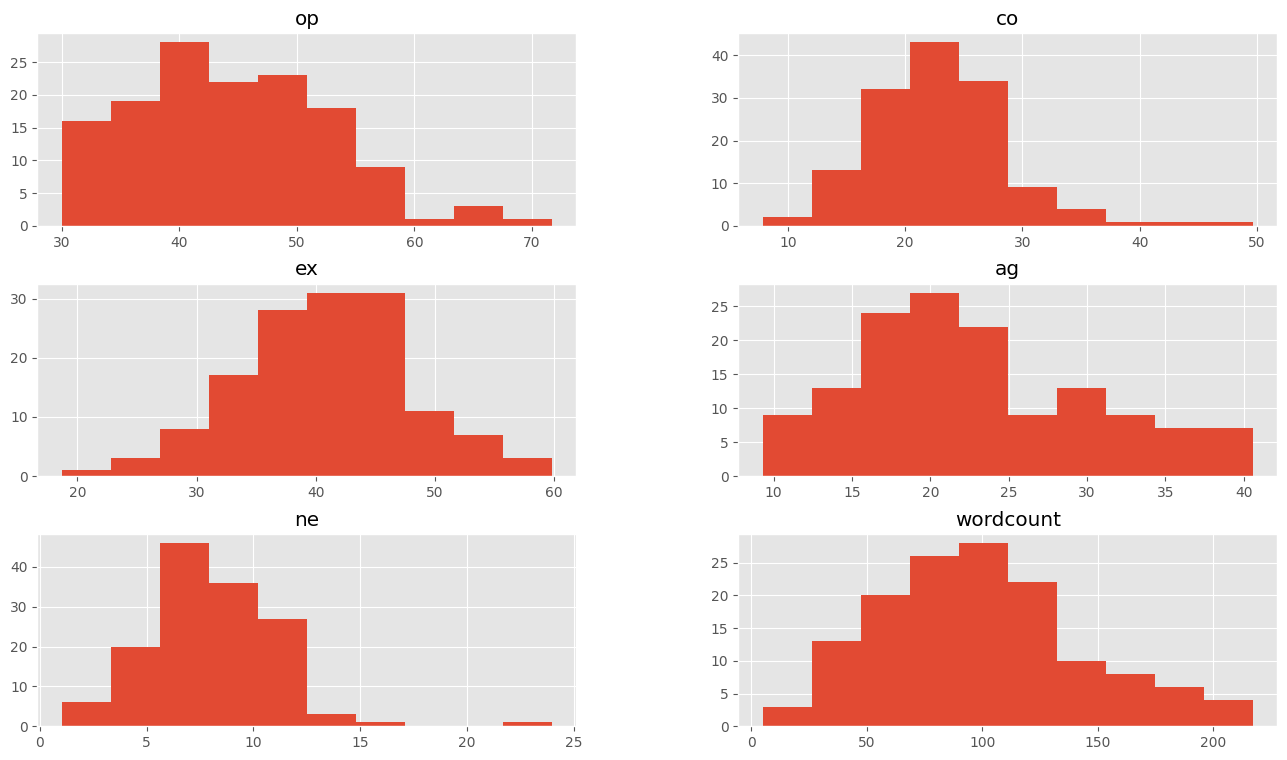

In [11]:
dataframe.drop(columns=["categoria"]).hist()
plt.show()

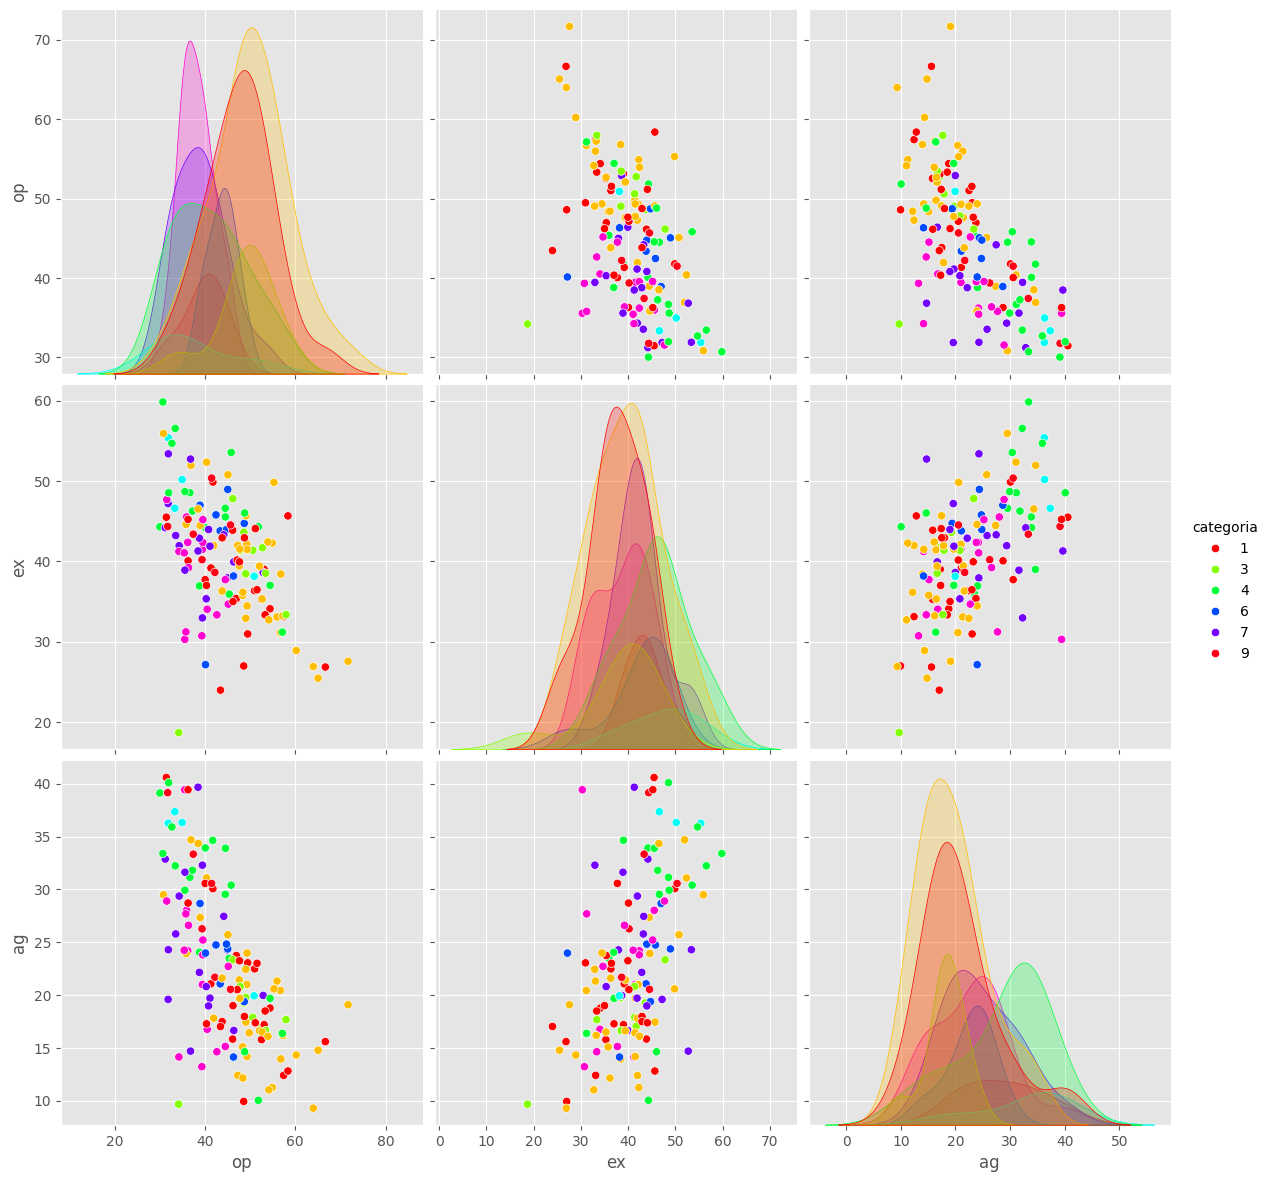

In [12]:
sb.pairplot(dataframe.dropna(),hue="categoria",height=4,vars=["op","ex","ag"],kind="scatter",palette="hsv")

In [13]:
x=np.array(dataframe[["op","ex","ag"]])
y=np.array(dataframe["categoria"])
x.shape

(140, 3)

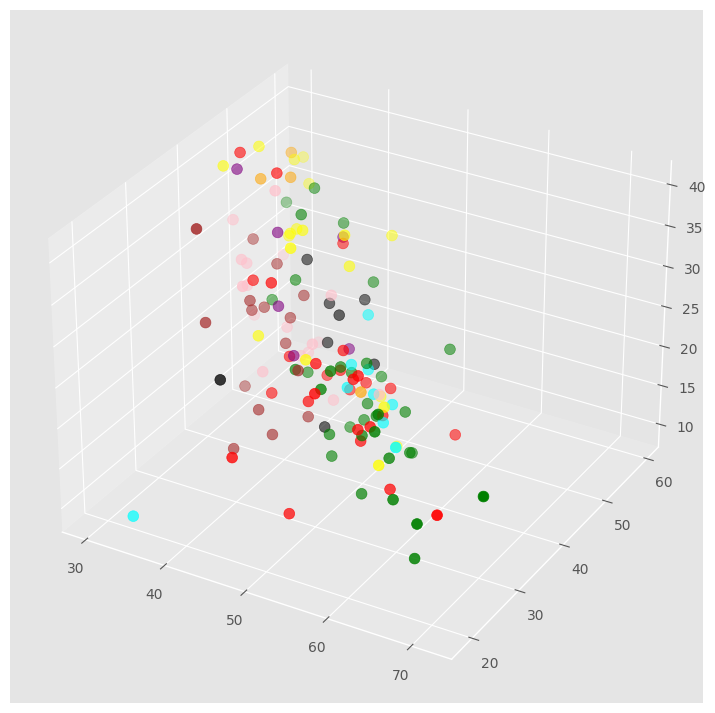

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
colores=["blue","red","green","cyan","yellow","orange","black","pink","brown","purple"]
asignar=[]
for row in y:
  asignar.append(colores[row])
ax.scatter(x[:,0],x[:,1],x[:,2],c=asignar,s=60)
plt.show()

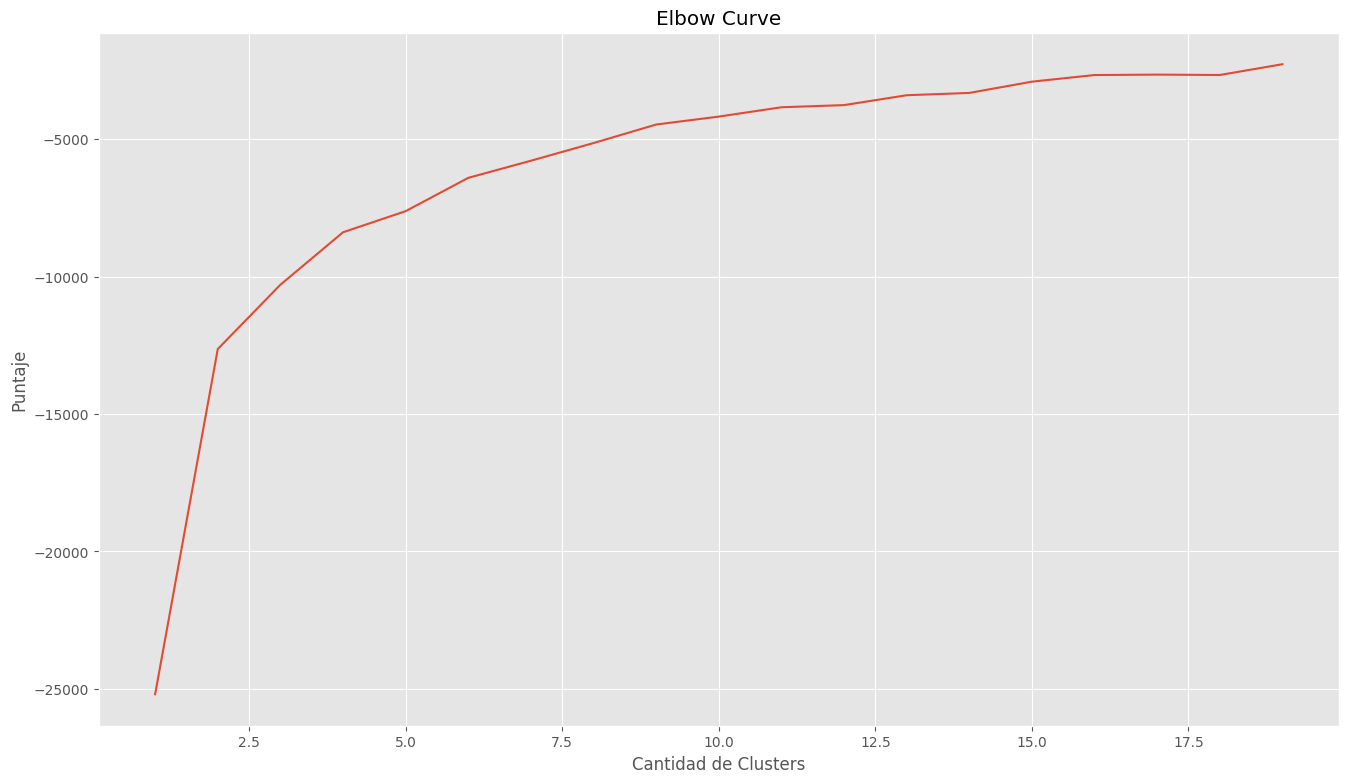

In [17]:
Nc=range(1,20)
kmeans=[KMeans(n_clusters=i).fit(x) for i in Nc]
kmeans
score=[kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Puntaje")
plt.title("Elbow Curve")
plt.show()

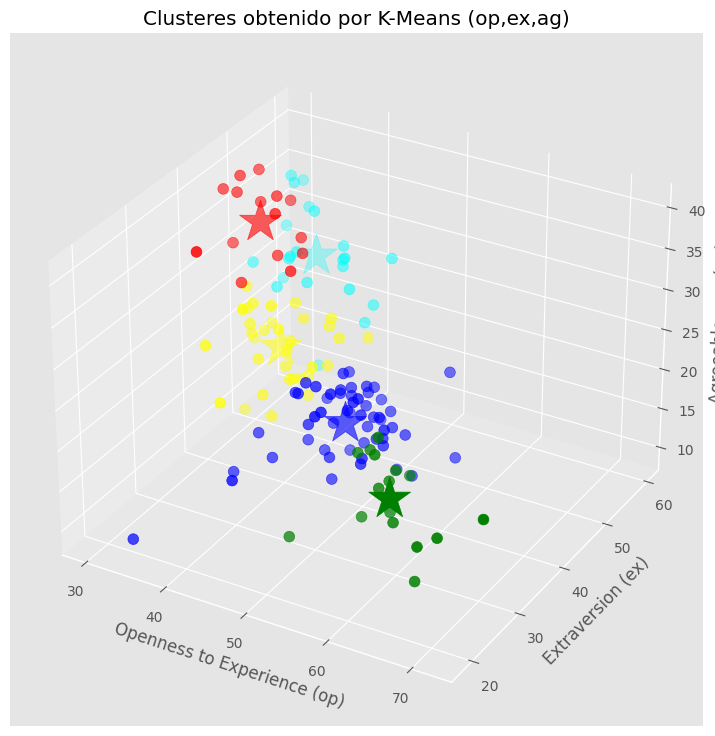

In [22]:
# Assuming optimal clusters is 5 based on the colors list length
model = kmeans[4] # Select the KMeans model with 5 clusters (index 4 for n_clusters=5)

labels = model.predict(x)
c = model.cluster_centers_

colores = ["blue","red","green","cyan","yellow"]
asignar = []
for row in labels:
  asignar.append(colores[row])

fig = plt.figure() # Corrected: plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x[:,0],x[:,1],x[:,2],c=asignar,s=60)
ax.scatter(c[:,0],c[:,1],c[:,2],marker="*",c=colores,s=1000)
ax.set_xlabel("Openness to Experience (op)") # Corrected: set_xlabel
ax.set_ylabel("Extraversion (ex)") # Corrected: set_ylabel
ax.set_zlabel("Agreeableness (ag)") # Corrected: set_zlabel
ax.set_title("Clusteres obtenido por K-Means (op,ex,ag)")
plt.show()

Text(0.5, 1.0, 'op vs ex')

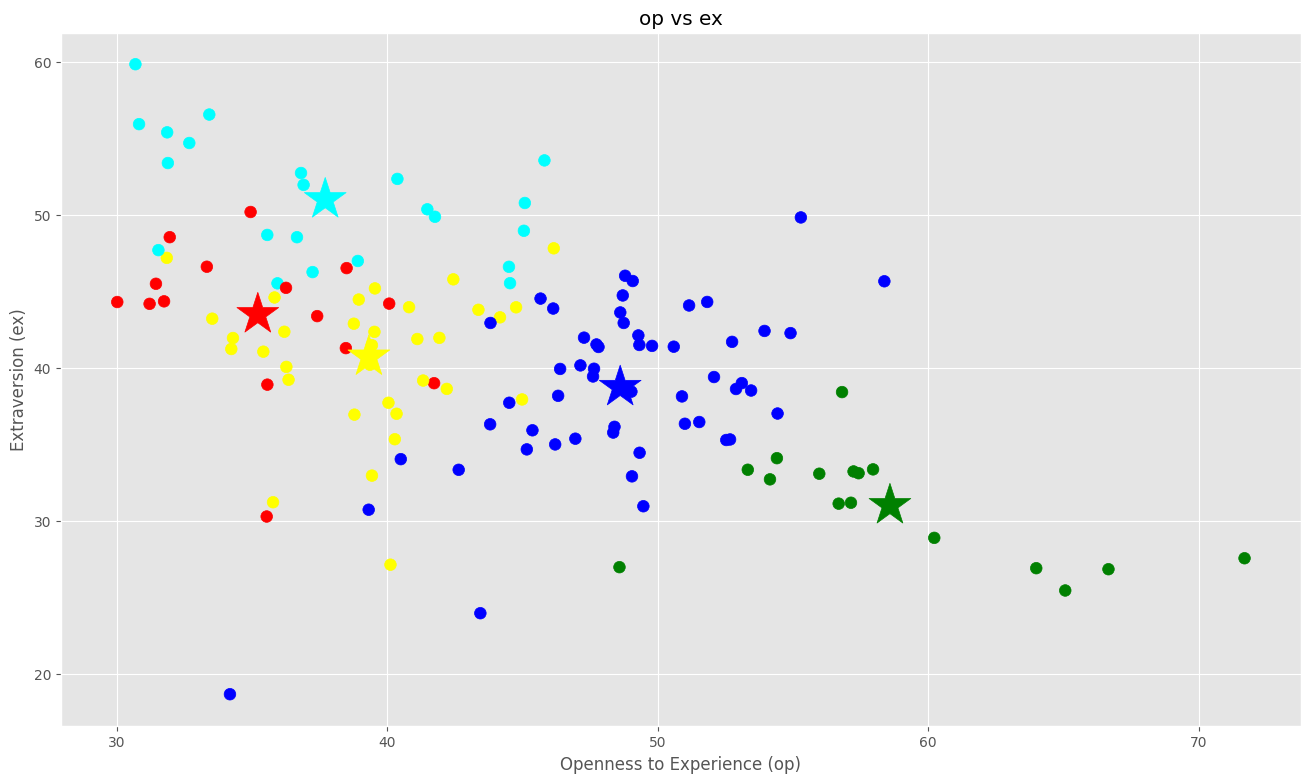

In [26]:
f1=dataframe["op"].values
f2=dataframe["ex"].values

plt.scatter(f1,f2,c=asignar,s=70)
plt.scatter(c[:,0],c[:,1],marker="*",c=colores,s=1000)
plt.xlabel("Openness to Experience (op)")
plt.ylabel("Extraversion (ex)")
plt.title("op vs ex")

In [29]:
copy=pd.DataFrame()
copy["usuario"]=dataframe["usuario"]
copy["categoria"]=dataframe["categoria"]
copy["label"]=labels;
cantidadGrupo=pd.DataFrame()
cantidadGrupo["Color"]=colores
cantidadGrupo["Cantidad"]=copy.groupby("label").size()
cantidadGrupo


,Color,Cantidad
0,blue,54
1,red,15
2,green,16
3,cyan,22
4,yellow,33


In [30]:
group_referrer_index=copy["label"]==0
group_referrals = copy[group_referrer_index]

diversidadGrupo=pd.DataFrame()
diversidadGrupo["categoria"]=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo["cantidad"]=group_referrals.groupby("categoria").size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,15.0
2,2,17.0
3,3,7.0
4,4,4.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,5.0
9,9,1.0


hacer distancia euclidiana manhatta laveshtein mahalnobis


In [32]:
closest,_= pairwise_distances_argmin_min(model.cluster_centers_,x)
closest

array([ 29, 139,  82,   4,  64])

In [33]:
user=dataframe["usuario"].values
for row in closest:
  print(user[row])

CindyCrawford
_josecoronado_
JudgeJudy
alfredocasero1
ierrejon


In [36]:
x_new=np.array([[45.92,57.74,15.66]])

new_labels=model.predict(x_new)
print(new_labels)

[3]
